# 2021 Day 13

https://adventofcode.com/2021/day/13

In [1]:
import io
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inp = open('input-13.txt').read()

In [3]:
test1 = """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5
"""

In [4]:
def parse_input(inp):
    inp = inp.strip()
    para1, para2 = inp.split('\n\n')
    coords = pd.read_csv(io.StringIO(para1), header=None, names=list('xy'))
    para2 = re.sub('fold along ', '', para2)
    folds = pd.read_csv(io.StringIO(para2), header=None, sep='=', names='fold value'.split())
    
    grid = np.zeros(1+coords.max().values, dtype=bool)
    for coord in coords.itertuples():
        grid[coord.x,coord.y] = True
    return coords, folds, grid

In [5]:
coords, folds, grid = parse_input(test1)
display(coords)
display(folds)

,x,y
0,6,10
1,0,14
2,9,10
3,0,3
4,10,4
5,4,11
6,6,0
7,6,12
8,4,1
9,0,13


,fold,value
0,y,7
1,x,5


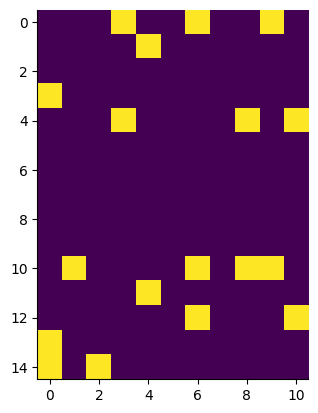

In [6]:
plt.imshow(grid.T);

## Part 1

In [7]:
def process_fold(grid, fold):
    fold, value = fold.fold, fold.value
    if fold == 'y':
        grid = grid.T
    grid = grid[:value] | grid[len(grid):value:-1]
    if fold == 'y':
        grid = grid.T
    return grid

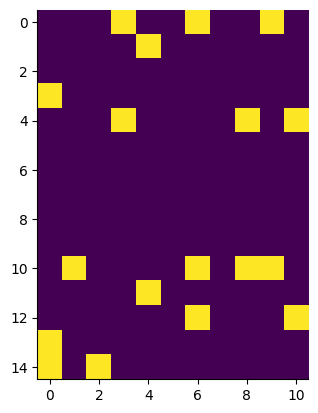

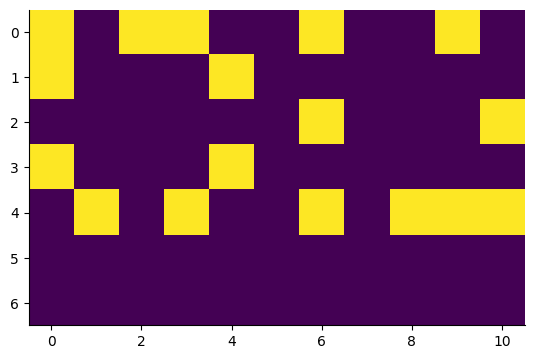

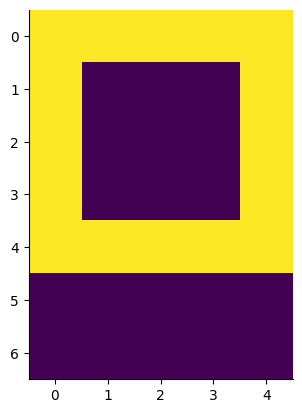

In [8]:
g = grid.copy()
plt.figure()
plt.imshow(g.T)
for fold in folds.itertuples():
    g = process_fold(g, fold)
    plt.figure()
    plt.imshow(g.T)

### Ok, now for the actual solution

In [9]:
coords, folds, grid = parse_input(inp)
print(grid.sum(), grid.mean())

953 0.0008122078331607498


In [10]:
g2 = process_fold(grid, folds.iloc[0])
g2.sum()

802

## Part 2

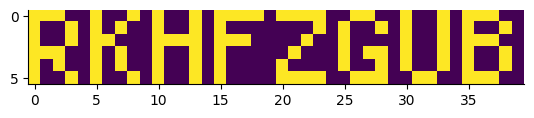

In [11]:
g = grid.copy()
for fold in folds.itertuples():
    g = process_fold(g, fold)
plt.imshow(g.T)